In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
nombres = ["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA","GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1","CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1","CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2","GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2","GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2"]

### Los datos no tenian encabezados por lo agregué una lista  con los nombres de estos, los cuales aparecian en otro documento adjunto.
### Los datos fueron obtenidos de la pagina del DEIS, y contienen todas las muertes(incluido la fecha, causa y otros datos) desde el año 2016 hasta la fecha
### Se eliminaron los datos nulos.

In [6]:
df = pd.read_csv("prueba.csv", ";" , names = nombres)
df.dropna( inplace = True)
df

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
58,2021,21-04-2021,Hombre,1,104,2101,Antofagasta,De Antofagasta,S602,S00-T98,...,CONTUSION DE OTRAS PARTES DE LA MUÑECA Y DE LA...,X599,V01-Y98,Causas externas de morbilidad y de mortalidad,X58-X59,Exposición accidental a otros factores y a los...,X59,Exposición a factores no especificados,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...
234,2021,20-04-2021,Hombre,1,98,13115,Lo Barnechea,Metropolitana de Santiago,S720,S00-T98,...,FRACTURA DEL CUELLO DEL FÉMUR,W190,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W19,Caída no especificada,W190,CAÍDA NO ESPECIFICADA OCURRIDA EN UNA VIVIENDA
264,2021,20-04-2021,Mujer,1,104,7303,Licantén,Del Maule,S721,S00-T98,...,FRACTURA PERTROCANTERIANA,W199,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W19,Caída no especificada,W199,CAÍDA NO ESPECIFICADA OCURRIDA EN UN LUGAR NO ...
327,2021,20-04-2021,Mujer,1,103,10301,Osorno,De Los Lagos,S720,S00-T98,...,FRACTURA DEL CUELLO DEL FÉMUR,W199,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W19,Caída no especificada,W199,CAÍDA NO ESPECIFICADA OCURRIDA EN UN LUGAR NO ...
421,2021,19-04-2021,Mujer,1,102,5801,Quilpué,De Valparaíso,S720,S00-T98,...,FRACTURA DEL CUELLO DEL FÉMUR,W199,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W19,Caída no especificada,W199,CAÍDA NO ESPECIFICADA OCURRIDA EN UN LUGAR NO ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594336,2016,01-01-2016,Hombre,1,53,14204,Río Bueno,De Los Ríos,T179,S00-T98,...,CUERPO EXTRAÑO EN LAS VÍAS RESPIRATORIAS PARTE...,W780,V01-Y98,Causas externas de morbilidad y de mortalidad,W75-W84,Otros accidentes que obstruyen la respración,W78,Inhalación de contenidos gástricos,W780,INHALACIÓN DE CONTENIDOS GÁSTRICOS OCURRIDA EN...
594354,2016,01-01-2016,Mujer,1,3,10102,Calbuco,De Los Lagos,S071,S00-T98,...,TRAUMATISMO POR APLASTAMIENTO DEL CRANEO,V595,V01-Y98,Causas externas de morbilidad y de mortalidad,V50-V59,Ocupante de camioneta o furgoneta lesionado e...,V59,Ocupante de camioneta o furgoneta lesionado en...,V595,PASAJERO(A) DE CAMIONETA O FURGONETA LESIONADO...
594359,2016,01-01-2016,Mujer,1,38,10101,Puerto Montt,De Los Lagos,T71X,S00-T98,...,ASFIXIA,X708,V01-Y98,Causas externas de morbilidad y de mortalidad,X60-X84,Lesiones autoinfligidas intencionalmente,X70,Lesión autoinfligida intencionalmente por ahor...,X708,LESIÓN AUTOINFLIGIDA INTENCIONALMENTE POR AHOR...
594373,2016,01-01-2016,Hombre,1,43,10101,Puerto Montt,De Los Lagos,T068,S00-T98,...,OTROS TRAUMATISMOS ESPECIFICADOS QUE AFECTAN M...,V093,V01-Y98,Causas externas de morbilidad y de mortalidad,V01-V09,Peatón lesionado en accidente de transporte,V09,Peatón lesionado en otros accidentes de transp...,V093,PEATÓN(A) LESIONADO(A) EN ACCIDENTE DE TRÁNSIT...


### En esta parte agrupé las muertes por causa, y sumé por semana, aprovechando la columna del dataframe "FECHA_DEF" , la cual le otorga el valor de 1 a cada muerte.


In [7]:
df = pd.read_csv("prueba.csv", ";" , names = nombres)
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF']) - pd.to_timedelta(7, unit='d')
df = df.groupby(['GLOSA_GRUPO_DIAG1', pd.Grouper(key='FECHA_DEF', freq='W-MON')])['EDAD_TIPO'].sum().reset_index().sort_values('FECHA_DEF')
df


,GLOSA_GRUPO_DIAG1,FECHA_DEF,EDAD_TIPO
0,Otros efectos y los no especificados de causa...,2015-12-28,27
24071,Traumatismos de la cabeza,2015-12-28,23
23803,Trastornos sistémicos del tejido conjuntivo,2015-12-28,1
4349,Enfermedad por virus de la inmunodeficiencia h...,2015-12-28,6
23585,Trastornos respiratorios y cardiovasculares es...,2015-12-28,6
...,...,...,...
20992,Trastornos de la glándula tiroides,2021-11-29,1
6275,Enfermedades de las venas y de los vasos y gan...,2021-11-29,2
14793,Otras enfermedades de los intestinos,2021-11-29,17
5419,Enfermedades cerebrovasculares,2021-11-29,89


In [8]:
df.head(20)


,GLOSA_GRUPO_DIAG1,FECHA_DEF,EDAD_TIPO
0,Otros efectos y los no especificados de causa...,2015-12-28,27
24071,Traumatismos de la cabeza,2015-12-28,23
23803,Trastornos sistémicos del tejido conjuntivo,2015-12-28,1
4349,Enfermedad por virus de la inmunodeficiencia h...,2015-12-28,6
23585,Trastornos respiratorios y cardiovasculares es...,2015-12-28,6
4607,Enfermedad renal tubulointersticial,2015-12-28,3
23021,Trastornos metabólicos,2015-12-28,5
4889,Enfermedades cardíacas reumáticas crónicas,2015-12-28,1
22756,Trastornos mentales y del comportamiento debid...,2015-12-28,4
5133,Enfermedades cerebrovasculares,2015-12-28,93


### Acá agrupé los datos por semana y sumé la columná "FECHA_DEF", para obtener las muertes totales por semana.

In [9]:

dosf = df.groupby( pd.Grouper(key='FECHA_DEF', freq='W-MON'))['EDAD_TIPO'].sum().reset_index().sort_values('FECHA_DEF')

dosf

,FECHA_DEF,EDAD_TIPO
0,2015-12-28,1194
1,2016-01-04,2163
2,2016-01-11,1955
3,2016-01-18,1955
4,2016-01-25,1929
...,...,...
305,2021-11-01,1092
306,2021-11-08,0
307,2021-11-15,0
308,2021-11-22,0


### Acá reduge el df a uno donde solo me mostrara las columnas que me importan, la fecha de muerte, el tipo de muerte y la suma de las muertes por causa,(esto lo tenia de versiones anteriores).

In [10]:
reduc = df[['FECHA_DEF','GLOSA_GRUPO_DIAG1','EDAD_TIPO']]
reduc

,FECHA_DEF,GLOSA_GRUPO_DIAG1,EDAD_TIPO
0,2015-12-28,Otros efectos y los no especificados de causa...,27
24071,2015-12-28,Traumatismos de la cabeza,23
23803,2015-12-28,Trastornos sistémicos del tejido conjuntivo,1
4349,2015-12-28,Enfermedad por virus de la inmunodeficiencia h...,6
23585,2015-12-28,Trastornos respiratorios y cardiovasculares es...,6
...,...,...,...
20992,2021-11-29,Trastornos de la glándula tiroides,1
6275,2021-11-29,Enfermedades de las venas y de los vasos y gan...,2
14793,2021-11-29,Otras enfermedades de los intestinos,17
5419,2021-11-29,Enfermedades cerebrovasculares,89


### Acá se obtuvo las muertes de influenza por semana


In [11]:
M_Influenza= reduc[reduc['GLOSA_GRUPO_DIAG1'] == 'Influenza [gripe] y neumonía']
M_Influenza

,FECHA_DEF,GLOSA_GRUPO_DIAG1,EDAD_TIPO
11261,2015-12-28,Influenza [gripe] y neumonía,30
11262,2016-01-04,Influenza [gripe] y neumonía,71
11263,2016-01-11,Influenza [gripe] y neumonía,100
11264,2016-01-18,Influenza [gripe] y neumonía,73
11265,2016-01-25,Influenza [gripe] y neumonía,60
...,...,...,...
11543,2021-08-30,Influenza [gripe] y neumonía,31
11544,2021-09-27,Influenza [gripe] y neumonía,32
11545,2021-10-25,Influenza [gripe] y neumonía,3
11546,2021-11-01,Influenza [gripe] y neumonía,13


### Acá se obtuvo las muertes por COVID-19 por semana, se utilizo esta columna por que 'Asignación provisoria de nuevas afecciones de etiología incierta', se divide en muertes por virus COVID-19 identificados y no identificados.

In [12]:
M_Covid= reduc[reduc['GLOSA_GRUPO_DIAG1'] == 'Asignación provisoria de nuevas afecciones de etiología incierta']
M_Covid

,FECHA_DEF,GLOSA_GRUPO_DIAG1,EDAD_TIPO
1556,2019-12-30,Asignación provisoria de nuevas afecciones de ...,412
1557,2020-01-06,Asignación provisoria de nuevas afecciones de ...,406
1558,2020-01-13,Asignación provisoria de nuevas afecciones de ...,114
1559,2020-01-20,Asignación provisoria de nuevas afecciones de ...,226
1560,2020-01-27,Asignación provisoria de nuevas afecciones de ...,267
...,...,...,...
1629,2021-08-30,Asignación provisoria de nuevas afecciones de ...,364
1630,2021-09-27,Asignación provisoria de nuevas afecciones de ...,374
1631,2021-10-25,Asignación provisoria de nuevas afecciones de ...,77
1632,2021-11-01,Asignación provisoria de nuevas afecciones de ...,298


### Grafico de la cantidad de muertes por influenza en color negro y las muertes totales en color azul.

<AxesSubplot:title={'center':'Muertes por Influenza vs Muertes totales'}, xlabel='FECHA_DEF'>

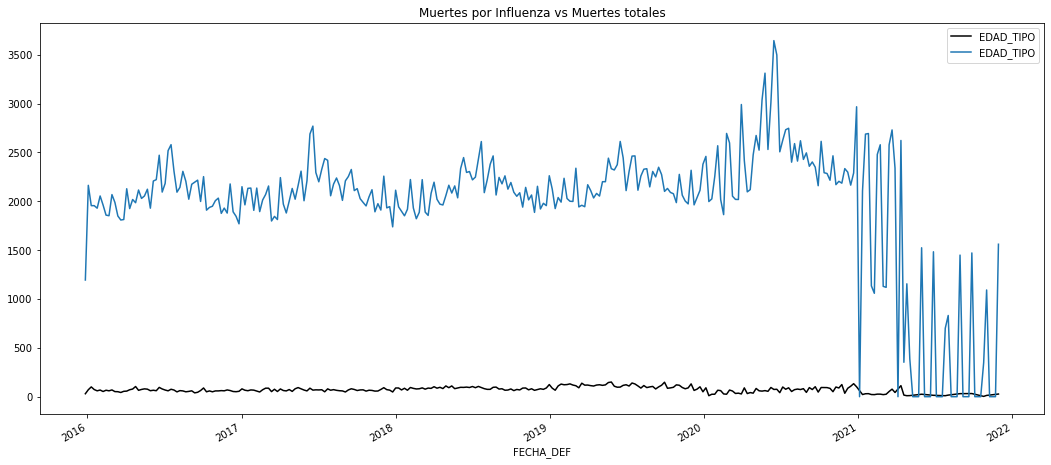

In [13]:
fig, ax = plt.subplots(figsize=(18,8))
M_Influenza.plot.line(x ='FECHA_DEF' ,y ='EDAD_TIPO', ax=ax, color='k', legend= 'Muertes Influenza')
plt.title('Muertes por Influenza vs Muertes totales') 
dosf.plot.line(x ='FECHA_DEF' ,y ='EDAD_TIPO', ax=ax)



### Grafico de la cantidad de muertes por COVID 19(confirmado y no confirmado) en color naranjo y las muertes totales en color azul.

<AxesSubplot:title={'center':'Muertes por Covid-19 vs Muertes totales'}, xlabel='FECHA_DEF'>

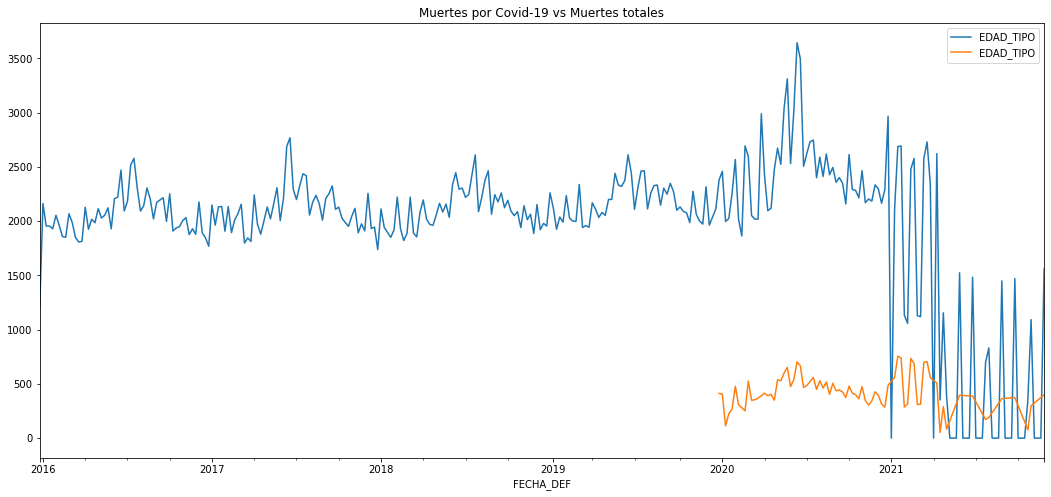

In [16]:
fig, ax = plt.subplots(figsize=(18,8))
plt.title('Muertes por Covid-19 vs Muertes totales') 
dosf.plot.line(x ='FECHA_DEF' ,y ='EDAD_TIPO', ax=ax)
M_Covid.plot.line(x ='FECHA_DEF' ,y ='EDAD_TIPO', ax=ax)




# Los registros en los graficos continuan pasado la fecha actual, pero desconozco la razón.